# Seminario-Taller: Procesamiento de Imágenes con Python 
Docentes: Dra. Laura M. Vargas y Dra. Valeria S. Rulloni

Resumen 
* Uso básico de Python necesario, uso de librerías
* Conceptos de imágenes y su procesamiento 
* Manejo y procesamiento de imágenes en Python

# Jornada 1
##  Imágenes:


Podemos definir una imagen como una función bidimensional  f(x1,x2)  donde  x=(x1,x2)  son las coordenadas espaciales, y el valor de  f  en cualquier  x  es la intensidad de la imagen en dicho punto, si es en grises o binaria. Si es en color hay 3 valores de intensidad, uno por cada canal: R, G y B.

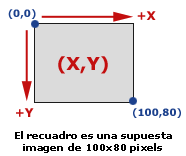        


Hay varias librerías para el manejo de imágenes en Python, algunas tareas son compartidas aunque en general cada librería tiene su especialidad.

La librería histórica es la **PIL (Python Image Library)**. Esta tiene un submódulo Image que antes era independiente, por eso es necesario indicarlo. Python no importa automáticamente los submódulos.
Se puede hacer:
from PIL import Image
o
import PIL.Image

**Observación**
Puede ser necesario instalar las librerías. 

Todas las dependencias o paquetes del Python se instalan con pip. El pip.exe viene con el Python, en las últimas versiones. PyPI: Python Package Index (https://pypi.org), el repositorio oficial de Python donde cualquier persona puede crear una cuenta y subir sus propios paquetes para que puedan ser usados por la comunidad. 

Para instalar el paquete basta poner:

*pip install nombre_del_paquete*


También se puede usar conda, si se utilizó el Anaconda:

*conda install nombre_paquete*

### PIL (Python Image Library). 


In [ ]:
#!pip install PIL #una sola vez quitar el primer # y tipear ctrl+entr, de este renglón o sino
#get_ipython().system('pip install PIL')

In [ ]:
#PIL Python Image Library
from PIL import Image
#Funciones:
#Image.open()
imagen=Image.open('lenna.jpg') #Carga la imagen (de archivo) en memoria
#Siempre para abrir una imagen de archivo, tenemos que estar ubicados en la carpeta donde tenemos 
#la imagen o bien conocer el Path completo de su ubicación 

print("El tamaño de la imagen es",imagen.size)#imprime tamaño
a=imagen.size #Podemos almacenar el valor en una variable
print("El tamaño de la imagen es",a)#imprime tamaño

print("El modo de la imagen es", imagen.mode) #indica si es en color, o gris
print("El tipo/formato de imagen es",imagen.format) #Si es png, pgm, jpg, etc.
imagen.show()#muestra la imagen abriendo otra pantalla


In [ ]:
#continuación
imagengris=imagen.convert('L') #Convierte la imagen en gris y la guarda en otra variable

print ("El tamaño, modo y formato de la imagen es", imagengris.size, imagengris.mode, imagengris.format)
 
imagengris.show()


### Guardar la imagen

In [ ]:
#continuación
imagengris.save('lenagris.jpg') #para variables tipo imagen de PIL
imagencargada=Image.open('lenagris.jpg')
print ("Ahora el tamaño, modo y formato de la imagen es", imagengris.size, imagengris.mode, imagengris.format)


### Para poder manipular numéricamente los valores de intensidad es necesario usar la librería numpy y convertir la imagen en un array.

In [ ]:
#continuación

import numpy as np #me permite convertir a array y manipular numéricamente
from matplotlib.pyplot import imshow
%matplotlib inline  
#permite mostrar la imagen en la misma pantalla
#Este comando solo se utiliza en el entorno de desarrollo de Jupyter Notebook

imagen_matriz=np.asarray(imagen)
imshow(imagen_matriz)#Observar que la función es imshow propia del matplotlib.pyplot 
#y no es nombredeimagen.show de Image

#Al transformar la imagen en array con numpy se puede fijar el tipo de dato.
imagen_matriz2=np.array(imagen,dtype=np.float32)
#Se puede llevar nuevamente la matriz a imagen y grabarla
Image.fromarray(imagen_matriz.astype(np.uint8)).save('prueba.jpg')

activar Kernel -> Restart & Clear Output
### Otra librería para manipulación y procesado de imágenes es **SimpleITK**. Primero hay que instalarla (por única vez)

In [ ]:
#!pip install SimpleITK #una sola vez quitar el primer # y tipear ctrl+entr, de este renglón o sino
#get_ipython().system('pip install SimpleITK')

In [ ]:
import SimpleITK as sitk #http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html

### Abrir una imagen con SimpleITK
Para abrir una imagen, tenemos que estar ubicados en la carpeta donde tenemos la imagen o bien conocer el Path completo de su ubicación

In [ ]:
import SimpleITK as sitk 
path="lenna.jpg" #nombre de la imagen (y ubicación, si está ubicada en otra carpeta)
ima=sitk.ReadImage(path) #lee el archivo y genera una variable TIPO IMAGEN
ima_arr = sitk.GetArrayFromImage(ima) #variable TIPO ARREGLO (3D)
print("La imagen", path)
print("es una imagen de tamaño",ima_arr.shape)


### Mostrar la imagen
 
 se puede usar sitk.Show(ima) si se tiene Fiji ( https://fiji.sc ) or ImageJ instalado correctamente en la compu
 
 sino se puede usar librería matplotlib

In [ ]:
#sitk.Show(ima) #help(sitk.Show) #This function requires that Fiji ( https://fiji.sc ) or ImageJ ( http://rsb.info.nih.gov/ij/) 
#be properly installed for Mac and Windows
import matplotlib.pyplot as plt
#se grafica usando el TIPO ARREGLO (3D)que en este caso se consiguió con la función de SimpleITk
#ima_arr = sitk.GetArrayFromImage(ima) 
plt.imshow(ima_arr)
plt.show()

activar Kernel -> Restart & Clear Output

Ejercicio 1:
abrir y graficar una imagen a elección (puede ser la imagen "daisy.jpg") Ayuda:sitk.ReadImage, sitk.GetArrayFromImage y plt.imshow

In [ ]:
import SimpleITK as sitk 


import matplotlib.pyplot as plt 


# Imágenes como arreglos o matrices 2D y 3D
Kernel... Restart & Clear

In [ ]:
#arreglos: matrices 2y 3D (pueden ser de más dimensiones)
import numpy as np
a=np.array([[[1,2,5,2],[4,2,1,3],[5,3,4,3]],[[1,2,5,2],[4,2,1,3],[5,3,4,3]]])
#a=np.array([[[[1,2],[5,2]],[[1,2],[5,2]],[[1,2],[5,2]]],[[[1,2],[5,2]],[[1,2],[5,2]],[[1,2],[5,2]]]])
print("a=", a)
print("dimensiones de a=", a.shape)
print("sum(a)=",sum(a))
print("dimensiones de sum(a)=",(sum(a)).shape)
a_t=np.transpose(a)
print("dimensiones de la traspuesta de a=" , a_t.shape)
#print(dir(a))

In [ ]:
#Kernel... Restart & Clear
##volvemos a la imagen como arreglo o matriz
import numpy as np
import SimpleITK as sitk 
path="lenna.jpg" #nombre de la imagen (y ubicación, si está ubicada en otra carpeta)
ima=sitk.ReadImage(path) #lee el archivo y genera una variable TIPO IMAGEN
ima_arr = sitk.GetArrayFromImage(ima) #variable TIPO ARREGLO (3D)
print("dimensiones de imagen a color R-G-B =" , ima_arr.shape)

In [ ]:
#continuación
import matplotlib.pyplot as plt 
rojo=ima_arr[:,:,0]
print("dimensiones de la componente roja (monocroma) =" , rojo.shape)
plt.imshow(rojo, cmap='gray')
plt.title('componente rojo')
plt.show()

### Uso de cmap (Color Map) o paleta de colores

In [ ]:
#continuación
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(8)
fig.set_figwidth(10)
axs[0].imshow(rojo, cmap='gray')
axs[0].set_title('componente rojo en escala de grises')
axs[1].imshow(rojo) 
axs[1].set_title('componente rojo con paleta por defecto (viridis)')
plt.show()

![](paleta1.png)
![](paleta3.png)

https://matplotlib.org/examples/color/colormaps_reference.html

In [ ]:
#continuación
verde=ima_arr[:,:,1]
azul=ima_arr[:,:,2]

monocroma=(rojo/3+verde/3+azul/3)
print("dimensiones de imagen monocroma  (R+G+B)/3=" , monocroma.shape)

#para gráfico de paleta
l=np.linspace(0,ima_arr.max(),256)
l=l.astype('uint8')
tr=np.zeros((256,40),'uint8')
for i in range(40):
    tr[:,i]=l

#paleta='inferno'
paleta='gray' #clásica

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
axs[0,0].imshow(ima_arr ,cmap=paleta)
axs[0,0].set_title("imagen color RGB")
axs[0,1].imshow(monocroma ,cmap=paleta)
axs[0,1].set_title("imagen monocroma (R+G+B)/3")
axs[0,2].imshow(tr,cmap=paleta)
axs[0,2].set_title(" referencia (paleta)")
axs[1,0].imshow(rojo ,cmap=paleta)
axs[1,0].set_title("componente roja:R=Red")
axs[1,1].imshow(verde ,cmap=paleta)
axs[1,1].set_title("componente verde:G=Green")
axs[1,2].imshow(azul ,cmap=paleta)
axs[1,2].set_title("componente azul:B=Blue")
plt.show()

activar Kernel -> Restart & Clear Output

**Ejercicio: Crear imagen monocroma 64x64 con intensidad creciente**

In [ ]:
import numpy as np
arr_2D=np.zeros((64,64))
print(type(arr_2D[0,0]))
print(arr_2D)
c=np.arange(64)#/64
for i in c: 
    arr_2D[i,:]=c #en cada fila intensidad creciente numéricamente
    
print(arr_2D)
print("dimensiones",np.shape(c),"y", np.shape(arr_2D))
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(10)
axs[0].imshow(arr_2D, cmap='gray')#ojo con la visualización de los datos
axs[0].set_title("minimo(0) negro, máximo (63) blanco")
axs[1].imshow(arr_2D, cmap='gray',vmin=0 ,vmax=255) #ojo con la visualización de los datos
axs[1].set_title("0 negro, 255 blanco")
plt.show()


activar Kernel -> Restart & Clear Output

**Ejercicio 2:**
construir y graficar una imagen cuadrada (tipo array) con fondo blanco y cruz negra

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
cruz=np.zeros((200,200))

#modifique la variable cruz de manera conveniente

plt.imshow(cruz, cmap='gray')
plt.show()

activar Kernel -> Restart & Clear Output

**Ejercicio: construir y graficar una imagen con colores**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

arr_image=np.zeros((256,256,3),'uint16')
print(type(arr_image[0,0,0]))
c=np.arange(256)#
#print(c)
for i in c[0:127]: #primeras 128 columnas
    arr_image[:,i,0]=c #rojo creciente en las primeras 128 columnas
    arr_image[:,i,1]=(255-c) #verde decreciente en las primeras 128 columnas

arr_image[:,128:,2]=255 #(solo) azul en las últimas columnas
print("R-rojo:")
print( arr_image[: ,:, 0])
print("G-verde:")
print( arr_image[:,:,1])
print("B-azul:")
print( arr_image[:,:,2])
plt.imshow(arr_image)
#plt.imshow(arr_image*8) #saturación en el gráfico

plt.show()

**Ejercicio 3:**
Construir y graficar una imagen (tipo array) con cuatro colores 

## OpenCV
La librería clásica por excelencia para el procesamiento de imágenes y visión por computadora es OpenCV (Computer Vision)
Para poder utilizarla en Python primero hay que instalarla:

Conectado a internet hacemos simplemente:

Con las teclas Windows+R pasamos a Ejecutar. Hacemos cmd o en el Anaconda Prompt y tipeamos el comando:

- pip install opencv-python

si no funciona, realizar: 

En el Anaconda Prompt,con el entorno Anaconda activo correr:
- conda install anaconda-client
- conda install --channel https://conda.anaconda.org/menpo opencv3

(gentileza de https://chrisconlan.com/installing-python-opencv-3-windows/)

Para confirmar que OpenCV 3 está instalado correr: 


In [ ]:
import cv2
cv2.__version__
#'3.4.3' ó '3.1.0'

Si es necesario hay que "matar" el kernel:

In [ ]:
#clear kernel
#Kernel - Restart & Clear Output

Recordar que para abrir una imagen, tenemos que estar ubicados en la carpeta donde tenemos la imagen o bien conocer el Path completo de su ubicación

In [ ]:
import cv2
IMAGEN=cv2.imread('lenna.jpg')
print(type(IMAGEN))
print(type(IMAGEN[1,1,1]))
print(IMAGEN.shape)

# Gráfico de imágenes con Opencv

In [ ]:
cv2.imshow('imagen',IMAGEN)
cv2.waitKey(0) #espera pulsado tecla
#No debe cerrarse la ventana ya que en ese caso no responde al pulsado posterior
#y no continúa la ejecución
cv2.destroyAllWindows() #destruye las ventanas creadas

**Ejercicios con PIL y numpy:** 

In [ ]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
path="daisy.jpg"
ima=Image.open(path) #tipo imagen
# get an array
ima_a = np.asarray(ima)#'uint8' a color (3D)
print(ima_a.shape, type(ima_a), type(ima_a[0,0,0]))
plt.imshow(ima_a)
plt.show()

**Recorte de imagen y modificación**

In [ ]:
#Continuación del anterior

ima_recorte=ima_a[50:150,100:200,:]
ima_falsocolor=ima_a[:,:,[1,2,0]]#cambia el orden de los canales de color

print("primer pixel imagen original",ima_a[0,0,:])#prueba para ver el cambio en los canales de color
print("primer pixel falso color",ima_falsocolor[0,0,:])

ima_adefecto=ima_a[:,:,:]/2 #más oscuro

print(ima_adefecto[0:1,0:1,:])
ima_adefecto=ima_adefecto.astype('uint8') #es importante convertir el tipo de dato
print(ima_adefecto[0:1,0:1,:])
#print(ima_adefecto.shape)

ima_adefecto[150:200,100:200,:]=0 #determinar un rectángulo negro dentro de la imagen oscurecida

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
axs[0].imshow(ima_recorte)
axs[0].set_title("Imagen recortada (zoom)")
axs[1].imshow(ima_falsocolor)
axs[1].set_title("Imagen completa en falsocolor")
axs[2].imshow(ima_adefecto)
axs[2].set_title("Oscura con defecto negro")

**Guardar imágenes creadas**

In [ ]:
#from PIL import Image
ima_r = Image.fromarray(ima_recorte) 
ima_r.save('flor_recorte.png')
ima_fc = Image.fromarray(ima_falsocolor) 
ima_fc.save('flor_falsocolor.png')
ima_d = Image.fromarray(ima_adefecto) 
ima_d.save('flor_con_defecto.png')